<a href="https://colab.research.google.com/github/amanjaiswal73892/changemypet/blob/master/Ensemble_tests_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [27]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True).eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [28]:
model2 = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True).eval()


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!git clone "https://github.com/amanjaiswal73892/changemypet.git"

Cloning into 'changemypet'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 5), reused 27 (delta 1), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [29]:
# sample execution (requires torchvision)
from PIL import Image, ImageOps
from torchvision import transforms

input_image = Image.open('/content/dog_translate.png')
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)

input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    model2.to('cuda')
# ouput_original_image = output.argmax(0).float()

In [ ]:
# # create a color pallette, selecting a color for each class
# palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
# colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
# colors = (colors % 255).numpy().astype("uint8")

# # plot the semantic segmentation predictions of 21 classes in each color
# r = Image.fromarray(ouput_original_image.byte().cpu().numpy()).resize(input_image.size)
# r.putpalette(colors)

# import matplotlib.pyplot as plt
# plt.imshow(r)
# # plt.show()

In [30]:
from changemypet.src.biggan import BigGAN512
import torch 
import torchvision
from scipy.stats import truncnorm
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [31]:
truncation = torch.clamp(torch.tensor(0.4), min=0.02+1e-4, max=1.0-1e-4).float()  # truncation is 0.4
c = torch.tensor((222,)).long()  # class_label is 260
z = truncation * torch.as_tensor(truncnorm.rvs(-2.0, 2.0, size=(1, 128),random_state=16)).float()

z.requires_grad = True

biggan = BigGAN512()

biggan.load_state_dict(torch.load("/content/drive/My Drive/biggan/biggan512-release.pt"))

<All keys matched successfully>

In [8]:

with torch.no_grad():
    output_predictions_2 = model2(input_batch)['out'][0]
    output_predictions_1 = model(input_batch)['out'][0]


In [205]:
loss2 = torch.nn.BCELoss()
pred = torch.nn.functional.softmax (output_predictions_1, dim = 0) # Softmax => 21 x 512 x512
target = output_predictions_2[[0,12]].argmax(0).unsqueeze(0).float()  # Target segmentation Map => 1 x 512 x 512
cost = loss2(pred[[12]],target )

In [206]:
cost

tensor(0.0230, device='cuda:0')

In [32]:
def softXEnt (input, target ):
    logprobs = torch.nn.functional.log_softmax (input, dim = 0)
    return  -(target * logprobs).sum() / (input.shape[1]*input.shape[2])

In [42]:
>>> # input values are logits
... input  = torch.autograd.Variable (torch.randn ((2, 5)))
>>> # target values are "soft" probabilities that sum to one (for each sample in batch)
... target = torch.nn.functional.softmax (torch.autograd.Variable (input, dim = 1)

SyntaxError: ignored

In [30]:
torch.randn ((2, 5))

tensor([[ 0.5527,  0.0249, -0.2800, -0.7998, -0.1090],
        [ 0.4667, -0.9908,  0.5793,  0.4887, -1.7509]])

In [51]:
target = torch.nn.functional.softmax (inoutpput, dim = 1)

In [200]:
input  = output_predictions_2[[0,12]]

In [211]:
torch.nn.functional.softmax (output_predictions_1, dim = 0)[12]

tensor([6.5509e-05, 6.5509e-05, 6.5509e-05, 6.5509e-05, 5.9741e-05, 4.9684e-05,
        4.1320e-05, 3.4363e-05, 2.8577e-05, 2.3765e-05, 1.9763e-05, 1.6435e-05,
        1.5378e-05, 1.6191e-05, 1.7047e-05, 1.7949e-05, 1.8898e-05, 1.9897e-05,
        2.0949e-05, 2.2056e-05, 2.2188e-05, 2.1326e-05, 2.0497e-05, 1.9701e-05,
        1.8935e-05, 1.8199e-05, 1.7492e-05, 1.6813e-05, 1.5954e-05, 1.4945e-05,
        1.4001e-05, 1.3116e-05, 1.2287e-05, 1.1511e-05, 1.0784e-05, 1.0102e-05,
        9.6205e-06, 9.3135e-06, 9.0163e-06, 8.7286e-06, 8.4501e-06, 8.1804e-06,
        7.9194e-06, 7.6667e-06, 7.5540e-06, 7.5753e-06, 7.5966e-06, 7.6180e-06,
        7.6395e-06, 7.6610e-06, 7.6826e-06, 7.7042e-06, 7.5183e-06, 7.1397e-06,
        6.7802e-06, 6.4388e-06, 6.1145e-06, 5.8066e-06, 5.5142e-06, 5.2365e-06,
        5.0370e-06, 4.9074e-06, 4.7812e-06, 4.6583e-06, 4.5385e-06, 4.4218e-06,
        4.3081e-06, 4.1973e-06, 4.2053e-06, 4.3326e-06, 4.4638e-06, 4.5990e-06,
        4.7383e-06, 4.8818e-06, 5.0297e-

In [207]:
t = torch.nn.functional.softmax (output_predictions_1[[0,12]], dim = 0)

In [204]:
softXEnt(input,t)

tensor(0.0457, device='cuda:0')

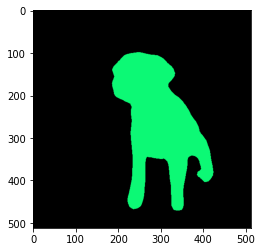

In [159]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r1 = Image.fromarray(output_predictions_1.argmax(0).byte().cpu().numpy()).resize(input_image.size)
r2 = Image.fromarray(output_predictions_2.argmax(0).byte().cpu().numpy()).resize(input_image.size)
r1.putpalette(colors)
r2.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r1)

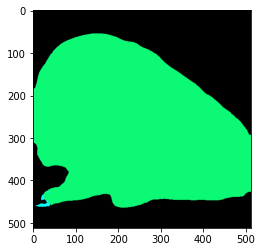

In [ ]:
plt.imshow(r2)

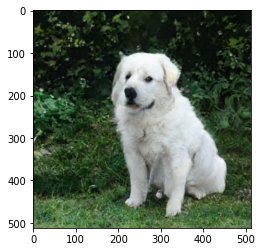

In [15]:
biggan.eval()
img = biggan(z, c, truncation.item())
pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
import PIL
# pil=ImageOps.mirror(pil)
# pil=pil.transpose(PIL.Image.ROTATE_90)
plt.imshow(pil)
# pil.save("dog_translate.png")

In [ ]:
(torch.ones(5,4) + torch.ones(5,4))/2

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.stack((a,b)).float().mean()

tensor(3.5000)

Epoch :  1
BCE_Loss  :  0.22468796372413635
MSE_Loss  :  0.050625089555978775
Soft_X_entropy_2_classes  :  0.37902364134788513


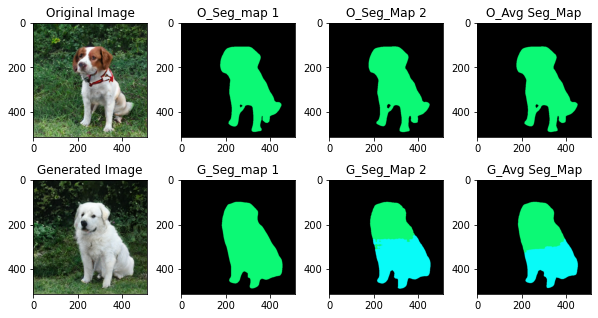

----------------------------------------------------------------------------------------------------
Epoch :  2
BCE_Loss  :  0.25779175758361816
MSE_Loss  :  0.04530324786901474
Soft_X_entropy_2_classes  :  0.3767659664154053


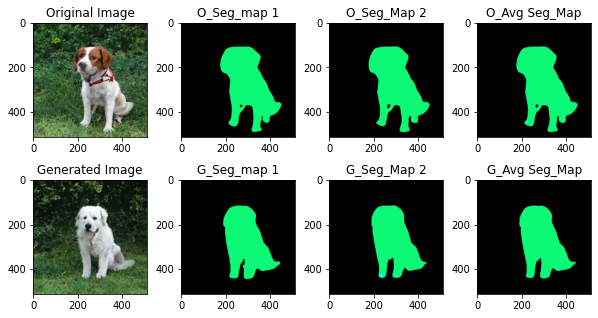

----------------------------------------------------------------------------------------------------
Epoch :  3
BCE_Loss  :  0.2763054370880127
MSE_Loss  :  0.04161902517080307
Soft_X_entropy_2_classes  :  0.37225341796875


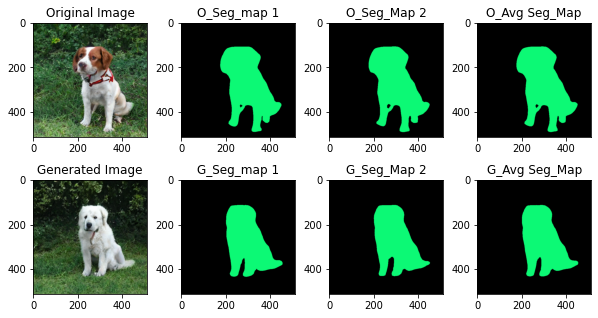

----------------------------------------------------------------------------------------------------
Epoch :  4
BCE_Loss  :  0.18179261684417725
MSE_Loss  :  0.03418445587158203
Soft_X_entropy_2_classes  :  0.36753708124160767


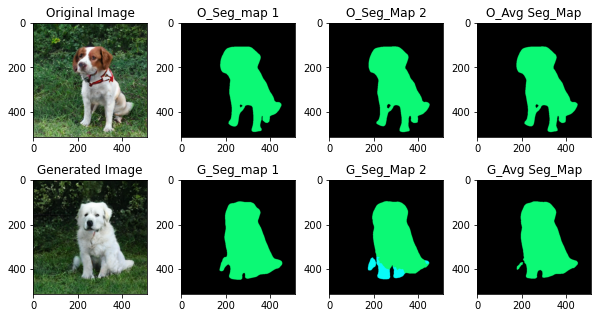

----------------------------------------------------------------------------------------------------
Epoch :  5
BCE_Loss  :  0.16538548469543457
MSE_Loss  :  0.0285983607172966
Soft_X_entropy_2_classes  :  0.3623034954071045


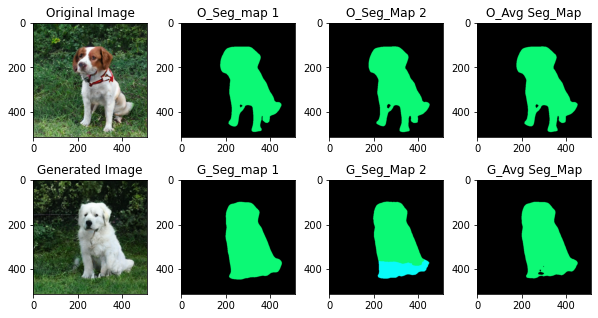

----------------------------------------------------------------------------------------------------
Epoch :  6
BCE_Loss  :  0.1493665874004364
MSE_Loss  :  0.024759752675890923
Soft_X_entropy_2_classes  :  0.35840368270874023


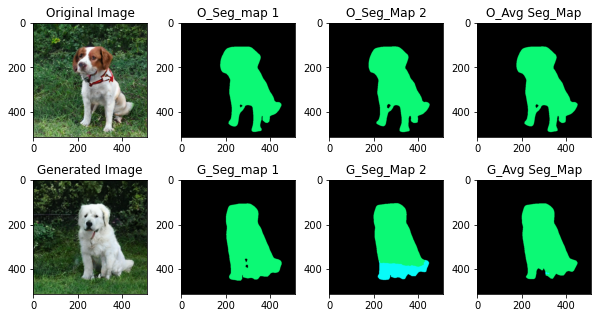

----------------------------------------------------------------------------------------------------
Epoch :  7
BCE_Loss  :  0.1169223040342331
MSE_Loss  :  0.023486629128456116
Soft_X_entropy_2_classes  :  0.3564906716346741


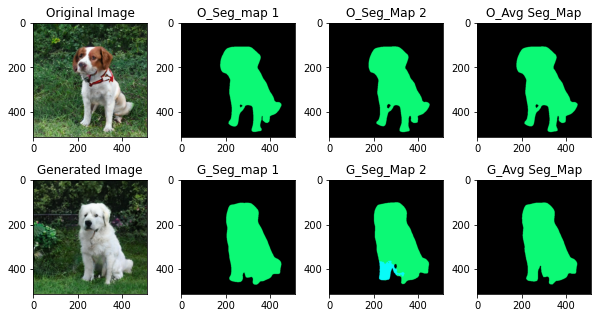

----------------------------------------------------------------------------------------------------
Epoch :  8
BCE_Loss  :  0.13595394790172577
MSE_Loss  :  0.026031294837594032
Soft_X_entropy_2_classes  :  0.3583000898361206


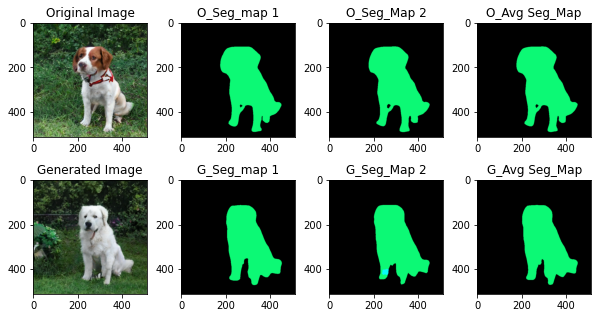

----------------------------------------------------------------------------------------------------
Epoch :  9
BCE_Loss  :  0.1129290908575058
MSE_Loss  :  0.0236637182533741
Soft_X_entropy_2_classes  :  0.35605132579803467


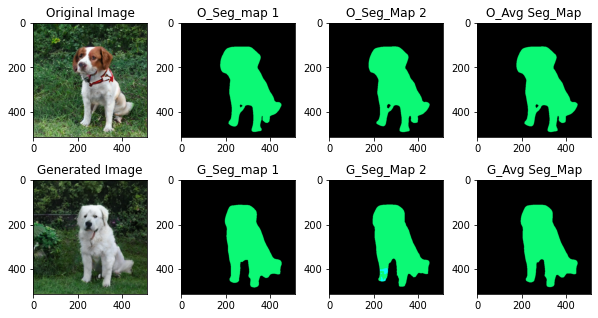

----------------------------------------------------------------------------------------------------
Epoch :  10
BCE_Loss  :  0.08910833299160004
MSE_Loss  :  0.01776248961687088
Soft_X_entropy_2_classes  :  0.34986481070518494


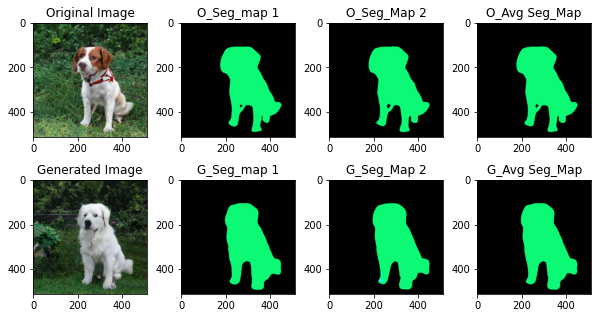

----------------------------------------------------------------------------------------------------
Epoch :  11
BCE_Loss  :  0.09691952168941498
MSE_Loss  :  0.017329351976513863
Soft_X_entropy_2_classes  :  0.3491079807281494


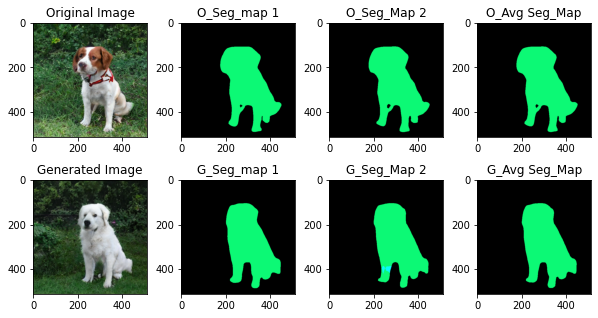

----------------------------------------------------------------------------------------------------
Epoch :  12
BCE_Loss  :  0.0913863256573677
MSE_Loss  :  0.015610037371516228
Soft_X_entropy_2_classes  :  0.3496701717376709


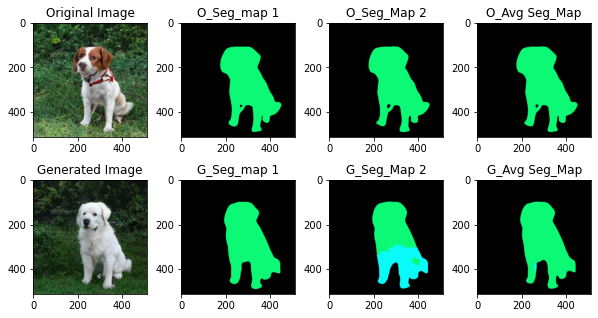

----------------------------------------------------------------------------------------------------
Epoch :  13
BCE_Loss  :  0.12123213708400726
MSE_Loss  :  0.026412483304739
Soft_X_entropy_2_classes  :  0.36093538999557495


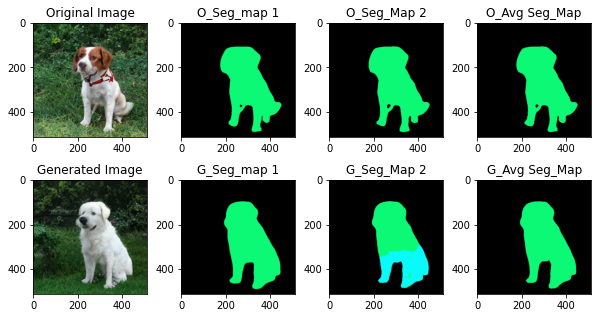

----------------------------------------------------------------------------------------------------
Epoch :  14
BCE_Loss  :  0.27916890382766724
MSE_Loss  :  0.053772494196891785
Soft_X_entropy_2_classes  :  0.38573041558265686


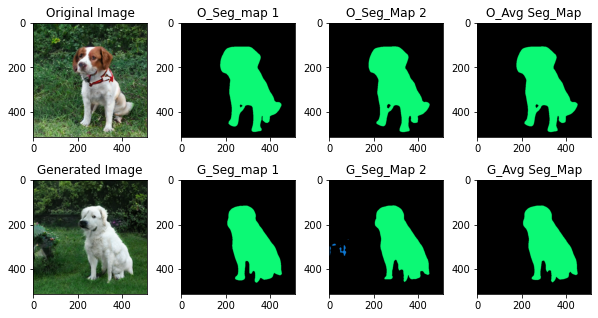

----------------------------------------------------------------------------------------------------
Epoch :  15
BCE_Loss  :  0.1699482500553131
MSE_Loss  :  0.03395800292491913
Soft_X_entropy_2_classes  :  0.36587387323379517


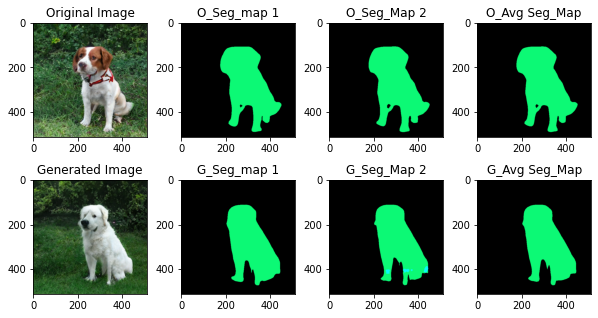

----------------------------------------------------------------------------------------------------
Epoch :  16
BCE_Loss  :  0.09132462739944458
MSE_Loss  :  0.018812213093042374
Soft_X_entropy_2_classes  :  0.3498939275741577


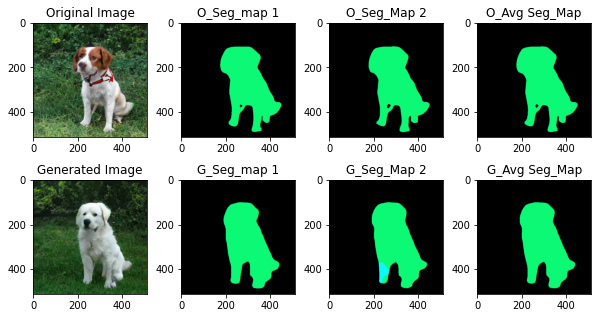

----------------------------------------------------------------------------------------------------
Epoch :  17
BCE_Loss  :  0.10497640073299408
MSE_Loss  :  0.021940091624855995
Soft_X_entropy_2_classes  :  0.3532710671424866


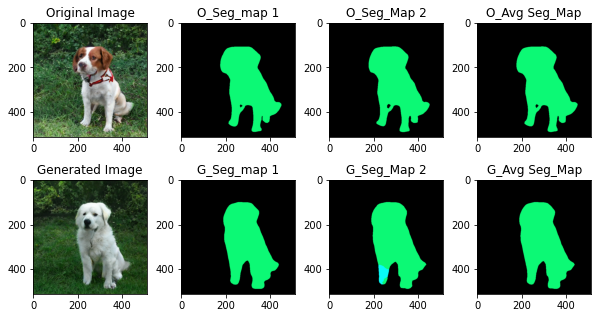

----------------------------------------------------------------------------------------------------
Epoch :  18
BCE_Loss  :  0.08164522051811218
MSE_Loss  :  0.015635505318641663
Soft_X_entropy_2_classes  :  0.3473321199417114


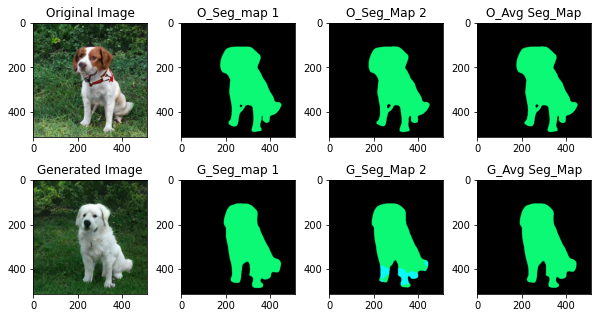

----------------------------------------------------------------------------------------------------
Epoch :  19
BCE_Loss  :  0.08398604393005371
MSE_Loss  :  0.015925345942378044
Soft_X_entropy_2_classes  :  0.34830838441848755


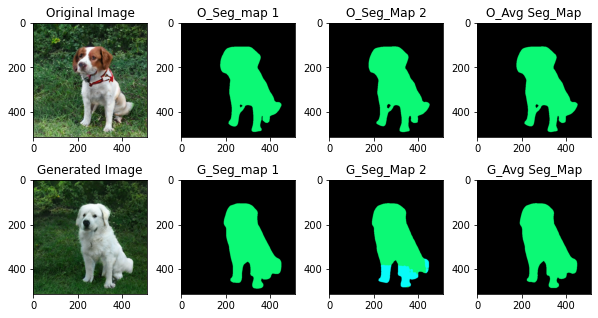

----------------------------------------------------------------------------------------------------
Epoch :  20
BCE_Loss  :  0.0796012356877327
MSE_Loss  :  0.015400325879454613
Soft_X_entropy_2_classes  :  0.3466477394104004


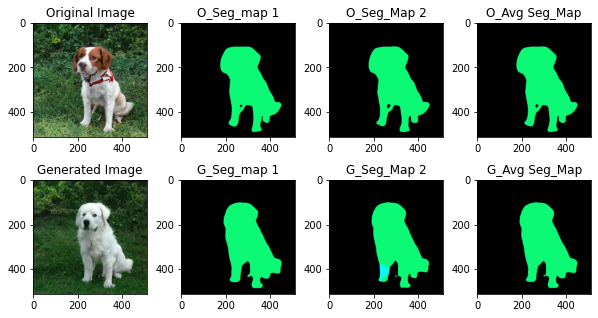

----------------------------------------------------------------------------------------------------
End


In [33]:

biggan.eval()
# optimizer = torch.optim.AdamW([z], lr=0.1)
optimizer = torch.optim.Adam([z], lr=1e-1, betas=(0.5, 0.999))

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

for i in range(20):
    with torch.enable_grad():
        optimizer.zero_grad()
        img = biggan(z, c, truncation.item())
        output_predicted_image_1 = model(0.5 * (img.cuda() + 1))['out'][0]
        output_predicted_image_2 = model2(0.5 * (img.cuda() + 1))['out'][0]
        output_p = (output_predicted_image_1 + output_predicted_image_2)/2  # average_predicted_output
        output_original_image_1 = model(input_batch)['out'][0]
        output_original_image_2 = model2(input_batch)['out'][0]
        output_o = (output_original_image_1 + output_original_image_2)/2 # average_original_output
    #     output_predicted_image = output.argmax(0).float()
        # loss = torch.nn.CrossEntropyLoss()
        loss2 = torch.nn.BCELoss()
        pred = output_p.exp()/output_p.exp().sum(axis=0) # Softmax => 21 x 512 x512
        target = output_o[[0,12]].argmax(0).unsqueeze(0).float()  # Target segmentation Map => 1 x 512 x 512
        cost_bce = loss2(pred[[12]],target ) # Passing only dog(class 12) predictions. 
        loss3 = torch.nn.MSELoss()
        t = torch.nn.functional.softmax (output_o, dim = 0) # softmax on the target 
        # cost_old = loss(output_p[[0,12]].unsqueeze(0), output_o[[0,12]].argmax(0).unsqueeze(0))
        cost_mse = loss3(pred[[0,12]],t[[0,12]])
        cost_x = softXEnt(output_p[[0,12]], t[[0,12]]) #passing unnormalised prediction and normalised target.
        # print("cost_old",i+1," is ", cost_old)
        print("Epoch : ",i+1)
        print("BCE_Loss  : ", cost_bce.item())
        print("MSE_Loss  : ", cost_mse.item())
        print("Soft_X_entropy_2_classes  : ", cost_x.item())


    fig = plt.figure(figsize=(10,5))
    plt.subplots_adjust(left = 0.125,right = 0.9,top=0.9,bottom = 0.1,wspace = 0.3,hspace = 0.2)

    ax1 = fig.add_subplot(241)
    ax1.title.set_text('Original Image')
    plt.imshow(input_image)

    ax2 = fig.add_subplot(242)
    ax2.title.set_text('O_Seg_map 1')
    r = Image.fromarray(model(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)
     
    ax3 = fig.add_subplot(243)
    ax3.title.set_text('O_Seg_Map 2')
    r = Image.fromarray(model2(input_batch)['out'][0].argmax(0).float().byte().cpu().numpy())#.resize(input_image.size)
    r.putpalette(colors)
    plt.imshow(r)

    ax4 = fig.add_subplot(244)
    ax4.title.set_text('O_Avg Seg_Map')
    r = Image.fromarray(output_o.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    ax5 = fig.add_subplot(245)
    ax5.title.set_text('Generated Image')
    pil = torchvision.transforms.ToPILImage()((0.5 * (img.data + 1)).squeeze())
    plt.imshow(pil)

    ax6 = fig.add_subplot(246)
    ax6.title.set_text('G_Seg_map 1')
    r = Image.fromarray(output_predicted_image_1.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

    ax7 = fig.add_subplot(247)
    ax7.title.set_text('G_Seg_Map 2')
    r = Image.fromarray(output_predicted_image_2.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)

 
    ax8 = fig.add_subplot(248)
    ax8.title.set_text('G_Avg Seg_Map')
    r = Image.fromarray(output_p.argmax(0).float().byte().cpu().numpy())
    r.putpalette(colors)
    plt.imshow(r)
    plt.show()

    print('-'*100)
    cost_x.backward()
    optimizer.step()

print('End')